In [1]:
from load import load_assets_info, load_events_info
from datetime import date, timedelta, datetime
import os
import pandas as pd
import cv2
import time
import umap
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
animeta = {'asset_name':'animeta','contract':"0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5",'start_date':date(2021, 7, 30)}
BAYC = {'asset_name':'BAYC','contract':"0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D",'start_date':date(2021, 5, 24)}
meebit = {'asset_name':'meebit','contract':"0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7",'start_date':date(2021, 5, 3)}
hashmask = {'asset_name':'hashmask','contract':"0xC2C747E0F7004F9E8817Db2ca4997657a7746928",'start_date':date(2021, 1, 30)}
penguin = {'asset_name':'penguin','contract':"0xBd3531dA5CF5857e7CfAA92426877b022e612cf8",'start_date':date(2021, 7, 23)}
veefriend = {'asset_name':'veefriend','contract':"0xa3AEe8BcE55BEeA1951EF834b99f3Ac60d1ABeeB",'start_date':date(2021, 5, 17)}
coolcat = {'asset_name':'coolcat','contract':"0x1A92f7381B9F03921564a437210bB9396471050C",'start_date':date(2021, 7, 1)}
cranium = {'asset_name':'cranium','contract':"0x85f740958906b317de6ed79663012859067E745B",'start_date':date(2021, 6, 17)}
svgdroids = {'asset_name':'droids','contract':"0xa6794dec66df7d8b69752956df1b28ca93f77cd7",'start_date':date(2021, 9, 7)}


In [3]:
collections = [svgdroids]
dataset = []

for collection in collections:
    save_location = str(os.getcwd())+ "\\static\\" + collection['asset_name'] + "\\";
    dataset.append((collection['asset_name'],
                   load_assets_info(save_location, asset_name=collection['asset_name'])
                    #
                   ))

#### Showing the data that exists from downloading

In [4]:
dataset[0][1]

array([{'id': 47589260, 'token_id': '19', 'num_sales': 0, 'background_color': None, 'image_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg', 'image_preview_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg=s250', 'image_thumbnail_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg=s128', 'image_original_url': 'https://d1iw5n6erb90fa.cloudfront.net/png/19.png', 'animation_url': None, 'animation_original_url': None, 'name': 'COMMUNITY Strategy Droid B-0020', 'description': 'The Droid war has been going on for years. On one side, Theos. On the other side, The Community. BIOS: 0x064c0e2fa736fde3beaa4aa0b6de16d3f488131fbd5a82910d8d05e5087a50ea', 'external_link': 'https://savagedroids.com/token/19', 'asset_contr

In [5]:
len(dataset[0][1])

8888

In [6]:
dataset[0][1][0]['collection']['created_date'][:10]

'2021-09-08'

In [7]:
sample = pd.DataFrame.from_dict(dataset[0][1][0], orient='index')
pd.DataFrame.from_dict(dataset[0][1][0], orient='index')

0
id                                                                   47589260
token_id                                                                   19
num_sales                                                                   0
background_color                                                         None
image_url                   https://lh3.googleusercontent.com/6yfyDS5g8MKY...
image_preview_url           https://lh3.googleusercontent.com/6yfyDS5g8MKY...
image_thumbnail_url         https://lh3.googleusercontent.com/6yfyDS5g8MKY...
image_original_url           https://d1iw5n6erb90fa.cloudfront.net/png/19.png
animation_url                                                            None
animation_original_url                                                   None
name                                          COMMUNITY Strategy Droid B-0020
description                 The Droid war has been going on for years. On ...
external_link                               https://savagedroids.com/token/19
asset_contract              {'address': '0xa6794dec66df7d8b69752956df1b28c...
permalink                   https://opensea.io/assets/0xa6794dec66df7d8b69...
collection                  {'banner_image_url': 'https://lh3.googleuserco...
decimals                                                                    0
token_metadata              https://d1iw5n6erb90fa.cloudfront.net/metadata/19
owner                       {'user': {'username': 'mrhammn'}, 'profile_img...
sell_orders                                                              None
creator                     {'user': {'username': None}, 'profile_img_url'...
traits                      [{'trait_type': 'Refactoring', 'value': 59, 'd...
last_sale                                                                None
top_bid                                                                  None
listing_date                                                             None
is_presale                                                              False
transfer_fee_payment_token                                               None
transfer_fee                                                             None

In [8]:
sample = sample.T
sample

id token_id num_sales background_color  \
0  47589260       19         0             None   

                                           image_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   

                                   image_preview_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   

                                 image_thumbnail_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   

                                 image_original_url animation_url  \
0  https://d1iw5n6erb90fa.cloudfront.net/png/19.png          None   

  animation_original_url  ...  \
0                   None  ...   

                                               owner sell_orders  \
0  {'user': {'username': 'mrhammn'}, 'profile_img...        None   

                                             creator  \
0  {'user': {'username': None}, 'profile_img_url'...   

                                              traits last_sale top_bid  \
0  [{'trait_type': 'Refactoring', 'value': 59, 'd...      None    None   

  listing_date is_presale transfer_fee_payment_token transfer_fee  
0         None      False                       None         None  

[1 rows x 28 columns]

### Getting all traits and doing dimensionality reduction

In [9]:
assets = dataset[0][1]

In [10]:
assets[0]

{'id': 47589260,
 'token_id': '19',
 'num_sales': 0,
 'background_color': None,
 'image_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg',
 'image_preview_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg=s250',
 'image_thumbnail_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg=s128',
 'image_original_url': 'https://d1iw5n6erb90fa.cloudfront.net/png/19.png',
 'animation_url': None,
 'animation_original_url': None,
 'name': 'COMMUNITY Strategy Droid B-0020',
 'description': 'The Droid war has been going on for years. On one side, Theos. On the other side, The Community. BIOS: 0x064c0e2fa736fde3beaa4aa0b6de16d3f488131fbd5a82910d8d05e5087a50ea',
 'external_link': 'https://savagedroids.com/token/19',
 'asset

In [11]:
assetsDF = pd.DataFrame.from_records(assets)
assetsDF.head()

id token_id  num_sales background_color  \
0  47589260       19          0             None   
1  47589259       29          1             None   
2  47589258       23          1             None   
3  47589256       27          0             None   
4  47589255       22          2             None   

                                           image_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   
1  https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2  https://lh3.googleusercontent.com/USR-2GWTbNp6...   
3  https://lh3.googleusercontent.com/AMnkjIixClDC...   
4  https://lh3.googleusercontent.com/aZGijPalGUQl...   

                                   image_preview_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   
1  https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2  https://lh3.googleusercontent.com/USR-2GWTbNp6...   
3  https://lh3.googleusercontent.com/AMnkjIixClDC...   
4  https://lh3.googleusercontent.com/aZGijPalGUQl...   

                                 image_thumbnail_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   
1  https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2  https://lh3.googleusercontent.com/USR-2GWTbNp6...   
3  https://lh3.googleusercontent.com/AMnkjIixClDC...   
4  https://lh3.googleusercontent.com/aZGijPalGUQl...   

                                 image_original_url animation_url  \
0  https://d1iw5n6erb90fa.cloudfront.net/png/19.png          None   
1  https://d1iw5n6erb90fa.cloudfront.net/png/29.png          None   
2  https://d1iw5n6erb90fa.cloudfront.net/png/23.png          None   
3  https://d1iw5n6erb90fa.cloudfront.net/png/27.png          None   
4  https://d1iw5n6erb90fa.cloudfront.net/png/22.png          None   

  animation_original_url  ...  \
0                   None  ...   
1                   None  ...   
2                   None  ...   
3                   None  ...   
4                   None  ...   

                                               owner sell_orders  \
0  {'user': {'username': 'mrhammn'}, 'profile_img...        None   
1  {'user': {'username': 'Bitcoinski'}, 'profile_...        None   
2  {'user': {'username': 'onevault'}, 'profile_im...        None   
3  {'user': {'username': '0xa478'}, 'profile_img_...        None   
4  {'user': {'username': None}, 'profile_img_url'...        None   

                                             creator  \
0  {'user': {'username': None}, 'profile_img_url'...   
1  {'user': {'username': None}, 'profile_img_url'...   
2  {'user': {'username': None}, 'profile_img_url'...   
3  {'user': {'username': None}, 'profile_img_url'...   
4  {'user': {'username': None}, 'profile_img_url'...   

                                              traits  \
0  [{'trait_type': 'Refactoring', 'value': 59, 'd...   
1  [{'trait_type': 'Efficiency', 'value': 16, 'di...   
2  [{'trait_type': 'Durability', 'value': 35, 'di...   
3  [{'trait_type': 'Energy', 'value': 152, 'displ...   
4  [{'trait_type': 'Backpack', 'value': 'None', '...   

                                           last_sale top_bid  listing_date  \
0                                               None    None          None   
1  {'asset': {'token_id': '29', 'decimals': 0}, '...    None          None   
2  {'asset': {'token_id': '23', 'decimals': 0}, '...    None          None   
3                                               None    None          None   
4  {'asset': {'token_id': '22', 'decimals': 0}, '...    None          None   

  is_presale transfer_fee_payment_token transfer_fee  
0      False                       None         None  
1      False                       None         None  
2      False                       None         None  
3      False                       None         None  
4      False                       None         None  

[5 rows x 28 columns]

In [12]:
# make a dict of all trait types e.g. eye type, weapon type, etc. and all values of that trait e.g. blue, submachine gun, etc.
def all_trait_values_dict(dataset):
    all_traits = {}
    for asset in dataset:
        for trait in asset['traits']:
            # Check if the trait type exists in our dictionary, if not add it
            if trait['trait_type'] not in all_traits:
                all_traits[trait['trait_type']] = []
            # Check if the trait type value exists in the list of values of the key otherwise add it
            if trait['value'] not in all_traits[trait['trait_type']]:
                all_traits[trait['trait_type']].append(trait['value'])
    
    return all_traits

In [13]:
trait_values_dict = all_trait_values_dict(assets)
trait_values_dict

{'Refactoring': [59,
  16,
  2,
  34,
  58,
  30,
  76,
  52,
  47,
  42,
  6,
  19,
  46,
  28,
  8,
  27,
  80,
  14,
  21,
  49,
  35,
  62,
  68,
  29,
  61,
  54,
  71,
  10,
  12,
  36,
  38,
  3,
  53,
  44,
  22,
  25,
  18,
  79,
  5,
  48,
  55,
  64,
  69,
  75,
  32,
  50,
  11,
  40,
  65,
  60,
  7,
  17,
  20,
  74,
  24,
  66,
  39,
  41,
  77,
  15,
  45,
  23,
  0,
  78,
  51,
  72,
  31,
  33,
  26,
  57,
  70,
  37,
  4,
  9,
  73,
  56,
  67,
  13,
  43,
  63,
  100],
 'Efficiency': [250,
  16,
  114,
  238,
  137,
  157,
  255,
  201,
  233,
  129,
  167,
  52,
  132,
  148,
  171,
  110,
  202,
  241,
  166,
  196,
  126,
  170,
  8,
  59,
  34,
  62,
  131,
  172,
  192,
  160,
  70,
  130,
  89,
  194,
  14,
  246,
  153,
  189,
  85,
  216,
  98,
  115,
  185,
  61,
  236,
  175,
  87,
  156,
  57,
  123,
  186,
  111,
  105,
  31,
  127,
  122,
  165,
  215,
  104,
  247,
  174,
  212,
  141,
  120,
  74,
  24,
  235,
  154,
  228,
  249,
  232,
  206,
  11,


In [14]:
# make a list of all unique trait types + values
def list_all_trait_values(trait_values_dict):
    trait_value_list = []
    for trait_type in trait_values_dict:
        for value in trait_values_dict[trait_type]:
            trait_value_list.append(str(trait_type)+"_"+str(value))
    return trait_value_list

In [15]:
trait_values_dict.keys()

dict_keys(['Refactoring', 'Efficiency', 'Eyes', 'Rank', 'Head', 'Arm', 'Energy', 'Damage', 'Class', 'Serial ID', 'Model', 'Halo', 'Neck Base', 'Sticker', 'Neck', 'Chest Plate', 'Fuel', 'Holo Display', 'Background', 'Durability', 'Compatability', 'Backpack', 'Armor', 'Atmospheric', 'Power', 'Faction'])

In [16]:
trait_value_list = list_all_trait_values(trait_values_dict)
trait_value_list

['Refactoring_59',
 'Refactoring_16',
 'Refactoring_2',
 'Refactoring_34',
 'Refactoring_58',
 'Refactoring_30',
 'Refactoring_76',
 'Refactoring_52',
 'Refactoring_47',
 'Refactoring_42',
 'Refactoring_6',
 'Refactoring_19',
 'Refactoring_46',
 'Refactoring_28',
 'Refactoring_8',
 'Refactoring_27',
 'Refactoring_80',
 'Refactoring_14',
 'Refactoring_21',
 'Refactoring_49',
 'Refactoring_35',
 'Refactoring_62',
 'Refactoring_68',
 'Refactoring_29',
 'Refactoring_61',
 'Refactoring_54',
 'Refactoring_71',
 'Refactoring_10',
 'Refactoring_12',
 'Refactoring_36',
 'Refactoring_38',
 'Refactoring_3',
 'Refactoring_53',
 'Refactoring_44',
 'Refactoring_22',
 'Refactoring_25',
 'Refactoring_18',
 'Refactoring_79',
 'Refactoring_5',
 'Refactoring_48',
 'Refactoring_55',
 'Refactoring_64',
 'Refactoring_69',
 'Refactoring_75',
 'Refactoring_32',
 'Refactoring_50',
 'Refactoring_11',
 'Refactoring_40',
 'Refactoring_65',
 'Refactoring_60',
 'Refactoring_7',
 'Refactoring_17',
 'Refactoring_20',

In [17]:
assets[1]['last_sale']['total_price']

'399000000000000000'

In [18]:
# make a dict of all assets and their trait types + value for that trait or 'none'
# includes number of traits
def asset_traits_dict(dataset, trait_values_dict):
    assets_traits = {}
    for asset in dataset:
        if asset['name'] not in assets_traits:
            assets_traits[asset['name']] = {key: None for key in trait_values_dict.keys()}
        for trait in asset['traits']:
            assets_traits[asset['name']][trait['trait_type']] = trait['value']
        assets_traits[asset['name']]['trait_count'] = len(asset['traits'])
    return assets_traits

In [19]:
assets_traits = asset_traits_dict(assets, trait_values_dict)
assets_traits

{'COMMUNITY Strategy Droid B-0020': {'Refactoring': 59,
  'Efficiency': 250,
  'Eyes': 'Optical: Community',
  'Rank': 'Strategy',
  'Head': 'Strategy: Copper',
  'Arm': 'Servo: Copper',
  'Energy': 42,
  'Damage': 247,
  'Class': 'Droid',
  'Serial ID': 20,
  'Model': 'B',
  'Halo': 'None',
  'Neck Base': 'Type B: Copper',
  'Sticker': 'None',
  'Neck': 'Compression: Stainless Steel',
  'Chest Plate': 'Composite: Copper',
  'Fuel': 'Carbon',
  'Holo Display': 'None',
  'Background': 'Wasteland',
  'Durability': 48,
  'Compatability': 84,
  'Backpack': 'None',
  'Armor': 142,
  'Atmospheric': 'None',
  'Power': 169,
  'Faction': 'COMMUNITY',
  'trait_count': 26},
 'COMMUNITY Scout Droid B-0030': {'Refactoring': 16,
  'Efficiency': 16,
  'Eyes': 'Refractive: Community',
  'Rank': 'Scout',
  'Head': 'Scout: Iron',
  'Arm': 'Supercoiled: Iron',
  'Energy': 40,
  'Damage': 125,
  'Class': 'Droid',
  'Serial ID': 30,
  'Model': 'B',
  'Halo': 'None',
  'Neck Base': 'Type B: Copper',
  'Stic

In [20]:
traitsDF = pd.DataFrame.from_dict(assets_traits,orient='index')
traitsDF.head()

Refactoring  Efficiency  \
COMMUNITY Strategy Droid B-0020           59         250   
COMMUNITY Scout Droid B-0030              16          16   
THEOS Purge Droid A-0024                   2         114   
COMMUNITY Purge Droid B-0028              34         238   
THEOS Elite Dark Droid A-0023             58         137   

                                                  Eyes        Rank  \
COMMUNITY Strategy Droid B-0020     Optical: Community    Strategy   
COMMUNITY Scout Droid B-0030     Refractive: Community       Scout   
THEOS Purge Droid A-0024               Particle: Theos       Purge   
COMMUNITY Purge Droid B-0028      Proximity: Community       Purge   
THEOS Elite Dark Droid A-0023            Motion: Theos  Elite Dark   

                                               Head                Arm  \
COMMUNITY Strategy Droid B-0020    Strategy: Copper      Servo: Copper   
COMMUNITY Scout Droid B-0030            Scout: Iron  Supercoiled: Iron   
THEOS Purge Droid A-0024              Purge: Copper  Pneumatic: Copper   
COMMUNITY Purge Droid B-0028            Purge: Iron     Linear: Copper   
THEOS Elite Dark Droid A-0023    Elite Dark: Copper     Linear: Copper   

                                 Energy  Damage  Class  Serial ID  ...  \
COMMUNITY Strategy Droid B-0020      42     247  Droid         20  ...   
COMMUNITY Scout Droid B-0030         40     125  Droid         30  ...   
THEOS Purge Droid A-0024            244     214  Droid         24  ...   
COMMUNITY Purge Droid B-0028        152     193  Droid         28  ...   
THEOS Elite Dark Droid A-0023       179       8  Droid         23  ...   

                                Holo Display Background Durability  \
COMMUNITY Strategy Droid B-0020         None  Wasteland         48   
COMMUNITY Scout Droid B-0030            None       Dawn         73   
THEOS Purge Droid A-0024                None    Antique         35   
COMMUNITY Purge Droid B-0028            None    Classic         46   
THEOS Elite Dark Droid A-0023           None    Antique         27   

                                Compatability          Backpack Armor  \
COMMUNITY Strategy Droid B-0020            84              None   142   
COMMUNITY Scout Droid B-0030               42              None    11   
THEOS Purge Droid A-0024                   61       Crude: Iron    88   
COMMUNITY Purge Droid B-0028               42  Emulsion: Copper     8   
THEOS Elite Dark Droid A-0023              74              None   238   

                                Atmospheric Power    Faction  trait_count  
COMMUNITY Strategy Droid B-0020        None   169  COMMUNITY           26  
COMMUNITY Scout Droid B-0030           None   184  COMMUNITY           26  
THEOS Purge Droid A-0024              Smoke   130      THEOS           26  
COMMUNITY Purge Droid B-0028           None   224  COMMUNITY           26  
THEOS Elite Dark Droid A-0023          None   195      THEOS           26  

[5 rows x 27 columns]

In [21]:
traitsDF.loc['COMMUNITY Scout Droid B-0030']

Refactoring                            16
Efficiency                             16
Eyes                Refractive: Community
Rank                                Scout
Head                          Scout: Iron
Arm                     Supercoiled: Iron
Energy                                 40
Damage                                125
Class                               Droid
Serial ID                              30
Model                                   B
Halo                                 None
Neck Base                  Type B: Copper
Sticker                              None
Neck                   Reinforced: Copper
Chest Plate      Reactive/SLERA-1: Copper
Fuel                                Hydro
Holo Display                         None
Background                           Dawn
Durability                             73
Compatability                          42
Backpack                             None
Armor                                  11
Atmospheric                       

In [22]:
# make a dict of all assets and their one hot equivalent of all their trait types and values
# DOES NOT include number of traits
def asset_traits_one_hot_dict(dataset, trait_value_list):
    assets_onehot = {}
    for asset in dataset:
        if asset['name'] not in assets_onehot:
            assets_onehot[asset['name']] = {key: 0 for key in trait_value_list}
        for trait in asset['traits']:
            assets_onehot[asset['name']][str(trait['trait_type'])+"_"+str(trait['value'])] = 1
    return assets_onehot

In [23]:
start = time.time()
assets_onehot = asset_traits_one_hot_dict(assets, trait_value_list)
print(time.time() - start)

6.1992878913879395


In [24]:
start = time.time()
onehotDF = pd.DataFrame.from_dict(assets_onehot,orient='index')
onehotDF.head()
print(time.time() - start)

100.16549110412598


In [25]:
assets[0]

{'id': 47589260,
 'token_id': '19',
 'num_sales': 0,
 'background_color': None,
 'image_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg',
 'image_preview_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg=s250',
 'image_thumbnail_url': 'https://lh3.googleusercontent.com/6yfyDS5g8MKY1z7En03FbqhurJR3zxT6OnmjsKMMzaDbXUgcCG3pnHQH_PqQAI_DSMyS3A5yjI2utIu9Pe9c1nAjvUp9ugWILBqXAgg=s128',
 'image_original_url': 'https://d1iw5n6erb90fa.cloudfront.net/png/19.png',
 'animation_url': None,
 'animation_original_url': None,
 'name': 'COMMUNITY Strategy Droid B-0020',
 'description': 'The Droid war has been going on for years. On one side, Theos. On the other side, The Community. BIOS: 0x064c0e2fa736fde3beaa4aa0b6de16d3f488131fbd5a82910d8d05e5087a50ea',
 'external_link': 'https://savagedroids.com/token/19',
 'asset

In [26]:
last_sale_prices = []
for asset in assets:
    if asset['last_sale']:
        last_sale_prices.append(int(asset['last_sale']['total_price']))
    else:
        last_sale_prices.append(0)

amin, amax = min(last_sale_prices), max(last_sale_prices)
for i, val in enumerate(last_sale_prices):
    last_sale_prices[i] = (val-amin) / (amax-amin)

In [27]:
def last_price(row):
    if row['last_sale']:
        return int(row['last_sale']['total_price'])*(10**-18)
    else:
        return 0

In [28]:
assetsDF['last_price'] = assetsDF.apply(lambda row: last_price(row), axis = 1) # col for last_price

In [29]:
assetsDF.head()

id token_id  num_sales background_color  \
0  47589260       19          0             None   
1  47589259       29          1             None   
2  47589258       23          1             None   
3  47589256       27          0             None   
4  47589255       22          2             None   

                                           image_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   
1  https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2  https://lh3.googleusercontent.com/USR-2GWTbNp6...   
3  https://lh3.googleusercontent.com/AMnkjIixClDC...   
4  https://lh3.googleusercontent.com/aZGijPalGUQl...   

                                   image_preview_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   
1  https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2  https://lh3.googleusercontent.com/USR-2GWTbNp6...   
3  https://lh3.googleusercontent.com/AMnkjIixClDC...   
4  https://lh3.googleusercontent.com/aZGijPalGUQl...   

                                 image_thumbnail_url  \
0  https://lh3.googleusercontent.com/6yfyDS5g8MKY...   
1  https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2  https://lh3.googleusercontent.com/USR-2GWTbNp6...   
3  https://lh3.googleusercontent.com/AMnkjIixClDC...   
4  https://lh3.googleusercontent.com/aZGijPalGUQl...   

                                 image_original_url animation_url  \
0  https://d1iw5n6erb90fa.cloudfront.net/png/19.png          None   
1  https://d1iw5n6erb90fa.cloudfront.net/png/29.png          None   
2  https://d1iw5n6erb90fa.cloudfront.net/png/23.png          None   
3  https://d1iw5n6erb90fa.cloudfront.net/png/27.png          None   
4  https://d1iw5n6erb90fa.cloudfront.net/png/22.png          None   

  animation_original_url  ... sell_orders  \
0                   None  ...        None   
1                   None  ...        None   
2                   None  ...        None   
3                   None  ...        None   
4                   None  ...        None   

                                             creator  \
0  {'user': {'username': None}, 'profile_img_url'...   
1  {'user': {'username': None}, 'profile_img_url'...   
2  {'user': {'username': None}, 'profile_img_url'...   
3  {'user': {'username': None}, 'profile_img_url'...   
4  {'user': {'username': None}, 'profile_img_url'...   

                                              traits  \
0  [{'trait_type': 'Refactoring', 'value': 59, 'd...   
1  [{'trait_type': 'Efficiency', 'value': 16, 'di...   
2  [{'trait_type': 'Durability', 'value': 35, 'di...   
3  [{'trait_type': 'Energy', 'value': 152, 'displ...   
4  [{'trait_type': 'Backpack', 'value': 'None', '...   

                                           last_sale top_bid listing_date  \
0                                               None    None         None   
1  {'asset': {'token_id': '29', 'decimals': 0}, '...    None         None   
2  {'asset': {'token_id': '23', 'decimals': 0}, '...    None         None   
3                                               None    None         None   
4  {'asset': {'token_id': '22', 'decimals': 0}, '...    None         None   

   is_presale transfer_fee_payment_token transfer_fee last_price  
0       False                       None         None      0.000  
1       False                       None         None      0.399  
2       False                       None         None      0.900  
3       False                       None         None      0.000  
4       False                       None         None      1.250  

[5 rows x 29 columns]

In [30]:
filtered_df = assetsDF.loc[assetsDF['last_price'] != 0]

In [31]:
len(filtered_df)

4174

#### Dictionary of assets + sales for each

In [32]:
# make a dict of all trait types e.g. eye type, weapon type, etc. and all values of that trait e.g. blue, submachine gun, etc.
def all_assets_sales_dict(sales):
    all_tokens = {}
    for asset in dataset:
        # Check if the token_id exists in our dictionary, if not add it
        if asset['token_id'] not in all_tokens:
            all_tokens[trait[asset['token_id']]] = []
        # Check if the trait type value exists in the list of values of the key otherwise add it
        if trait['value'] not in all_traits[trait['trait_type']]:
            all_traits[trait['trait_type']].append(trait['value'])
    
    return all_traits

In [33]:
trait_values_dict = all_trait_values_dict(assets)
trait_values_dict

{'Refactoring': [59,
  16,
  2,
  34,
  58,
  30,
  76,
  52,
  47,
  42,
  6,
  19,
  46,
  28,
  8,
  27,
  80,
  14,
  21,
  49,
  35,
  62,
  68,
  29,
  61,
  54,
  71,
  10,
  12,
  36,
  38,
  3,
  53,
  44,
  22,
  25,
  18,
  79,
  5,
  48,
  55,
  64,
  69,
  75,
  32,
  50,
  11,
  40,
  65,
  60,
  7,
  17,
  20,
  74,
  24,
  66,
  39,
  41,
  77,
  15,
  45,
  23,
  0,
  78,
  51,
  72,
  31,
  33,
  26,
  57,
  70,
  37,
  4,
  9,
  73,
  56,
  67,
  13,
  43,
  63,
  100],
 'Efficiency': [250,
  16,
  114,
  238,
  137,
  157,
  255,
  201,
  233,
  129,
  167,
  52,
  132,
  148,
  171,
  110,
  202,
  241,
  166,
  196,
  126,
  170,
  8,
  59,
  34,
  62,
  131,
  172,
  192,
  160,
  70,
  130,
  89,
  194,
  14,
  246,
  153,
  189,
  85,
  216,
  98,
  115,
  185,
  61,
  236,
  175,
  87,
  156,
  57,
  123,
  186,
  111,
  105,
  31,
  127,
  122,
  165,
  215,
  104,
  247,
  174,
  212,
  141,
  120,
  74,
  24,
  235,
  154,
  228,
  249,
  232,
  206,
  11,


### PCA

In [34]:
filtered_df['bin'] = pd.qcut(filtered_df['last_price'], q=8, precision=0, duplicates='drop')
filtered_df['bin_cats'] = filtered_df['bin'].cat.codes
filtered_df['bin'] = filtered_df['bin'].astype(str)

<ipython-input-34-4d7c53bbc257>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bin'] = pd.qcut(filtered_df['last_price'], q=8, precision=0, duplicates='drop')
<ipython-input-34-4d7c53bbc257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bin_cats'] = filtered_df['bin'].cat.codes
<ipython-input-34-4d7c53bbc257>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [35]:
filtered_df.head()

id token_id  num_sales background_color  \
1   47589259       29          1             None   
2   47589258       23          1             None   
4   47589255       22          2             None   
6   47589253       21          1             None   
10  47589246       28          1             None   

                                            image_url  \
1   https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2   https://lh3.googleusercontent.com/USR-2GWTbNp6...   
4   https://lh3.googleusercontent.com/aZGijPalGUQl...   
6   https://lh3.googleusercontent.com/Oitp5j7JGL2b...   
10  https://lh3.googleusercontent.com/moxZCODNzCOJ...   

                                    image_preview_url  \
1   https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2   https://lh3.googleusercontent.com/USR-2GWTbNp6...   
4   https://lh3.googleusercontent.com/aZGijPalGUQl...   
6   https://lh3.googleusercontent.com/Oitp5j7JGL2b...   
10  https://lh3.googleusercontent.com/moxZCODNzCOJ...   

                                  image_thumbnail_url  \
1   https://lh3.googleusercontent.com/-Yz1eaAouL3j...   
2   https://lh3.googleusercontent.com/USR-2GWTbNp6...   
4   https://lh3.googleusercontent.com/aZGijPalGUQl...   
6   https://lh3.googleusercontent.com/Oitp5j7JGL2b...   
10  https://lh3.googleusercontent.com/moxZCODNzCOJ...   

                                  image_original_url animation_url  \
1   https://d1iw5n6erb90fa.cloudfront.net/png/29.png          None   
2   https://d1iw5n6erb90fa.cloudfront.net/png/23.png          None   
4   https://d1iw5n6erb90fa.cloudfront.net/png/22.png          None   
6   https://d1iw5n6erb90fa.cloudfront.net/png/21.png          None   
10  https://d1iw5n6erb90fa.cloudfront.net/png/28.png          None   

   animation_original_url  ...  \
1                    None  ...   
2                    None  ...   
4                    None  ...   
6                    None  ...   
10                   None  ...   

                                               traits  \
1   [{'trait_type': 'Efficiency', 'value': 16, 'di...   
2   [{'trait_type': 'Durability', 'value': 35, 'di...   
4   [{'trait_type': 'Backpack', 'value': 'None', '...   
6   [{'trait_type': 'Damage', 'value': 154, 'displ...   
10  [{'trait_type': 'Durability', 'value': 38, 'di...   

                                            last_sale top_bid listing_date  \
1   {'asset': {'token_id': '29', 'decimals': 0}, '...    None         None   
2   {'asset': {'token_id': '23', 'decimals': 0}, '...    None         None   
4   {'asset': {'token_id': '22', 'decimals': 0}, '...    None         None   
6   {'asset': {'token_id': '21', 'decimals': 0}, '...    None         None   
10  {'asset': {'token_id': '28', 'decimals': 0}, '...    None         None   

   is_presale transfer_fee_payment_token  transfer_fee last_price  \
1       False                       None          None      0.399   
2       False                       None          None      0.900   
4       False                       None          None      1.250   
6       False                       None          None      0.350   
10      False                       None          None      0.400   

            bin bin_cats  
1   (0.22, 5.0]        7  
2   (0.22, 5.0]        7  
4   (0.22, 5.0]        7  
6   (0.22, 5.0]        7  
10  (0.22, 5.0]        7  

[5 rows x 31 columns]

In [36]:
print(filtered_df['bin'].unique())

['(0.22, 5.0]' '(0.1, 0.13]' '(0.2, 0.22]' '(0.13, 0.15]' '(0.03, 0.1]'
 '(0.18, 0.2]' '(0.15, 0.16]' '(0.16, 0.18]']


In [37]:
%%time
embedding = umap.UMAP(n_neighbors=40).fit_transform(onehotDF)

Wall time: 1min 37s


In [38]:
filtered_df['x'] = 0.0
filtered_df['y'] = 0.0

for index, row in enumerate(embedding):
    filtered_df.at[index,'x'] = row[0]
    filtered_df.at[index,'y'] = row[1]

<ipython-input-38-a2165099d995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['x'] = 0.0
<ipython-input-38-a2165099d995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['y'] = 0.0
C:\Users\ajduf\anaconda3\lib\site-packages\pandas\core\frame.py:3281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s

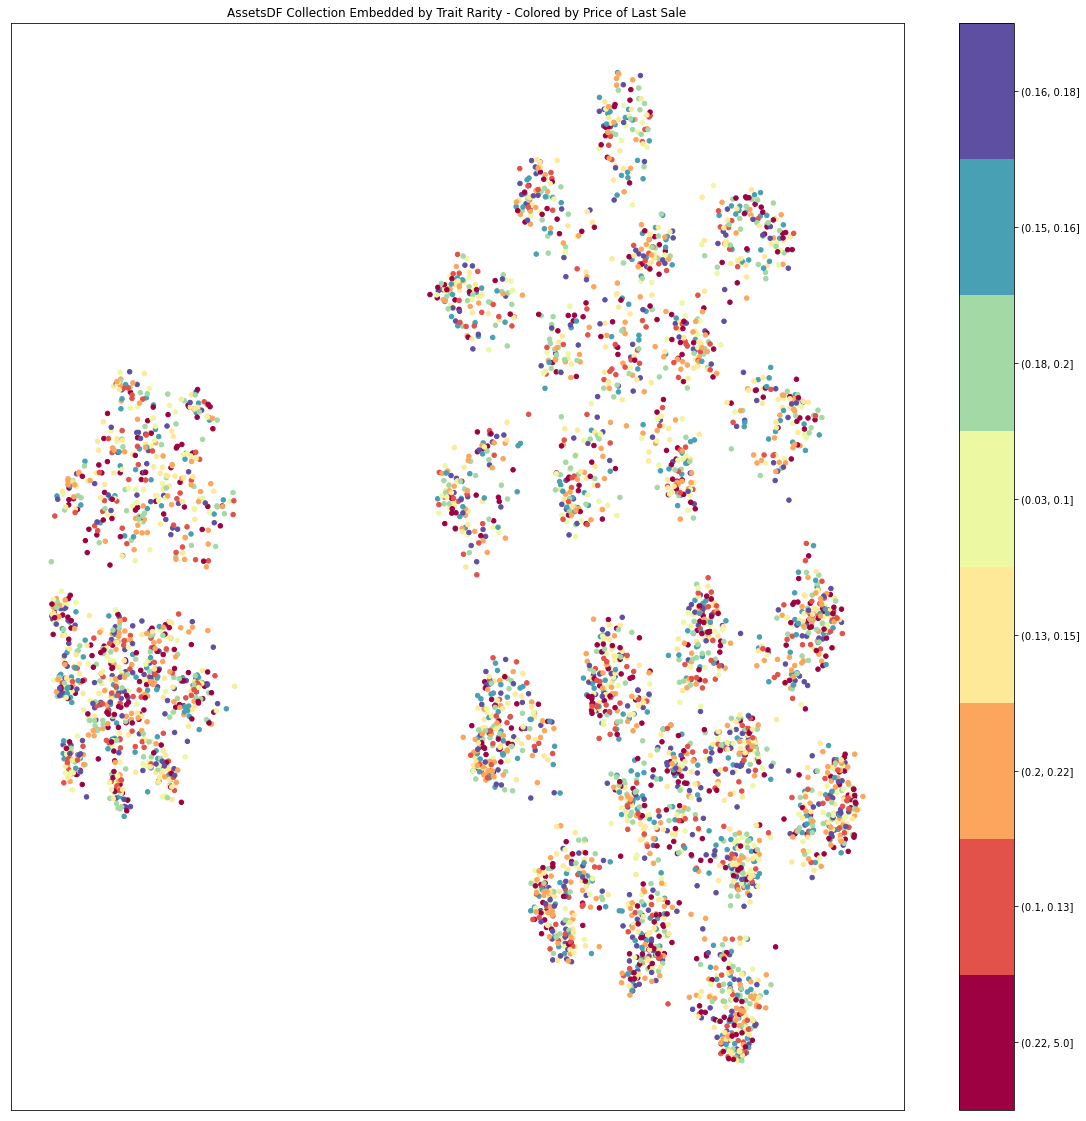

In [39]:
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.scatter(*embedding.T, s=20, c=filtered_df['bin_cats'], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
plt.title('AssetsDF Collection Embedded by Trait Rarity - Colored by Price of Last Sale');
cbar = plt.colorbar(boundaries=np.arange(9)-0.5)
cbar.set_ticks(np.arange(8))
cbar.set_ticklabels(filtered_df['bin'].unique())

In [40]:
def plot_3d(component1,component2,component3,labels):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=labels,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [41]:
start = time.time()
reducer = umap.UMAP(random_state=42, n_neighbors=30, n_components=3)
embedding = reducer.fit_transform(onehotDF)
print(time.time() - start)

83.01354002952576


In [42]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2],list(filtered_df['bin_cats']))